In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

import sys
import glob
import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
stop = stopwords.words('english')
stop = stop + [u'said',u'back',u'like',u'know',u'little']

In [3]:
tokenizer = RegexpTokenizer(r'\w+')

In [4]:
texts = []
path = '/home/amn34/metis/stuff/noirs/hammett'
for books in sorted(glob.glob(os.path.join(path, '*.txt'))):
    doc = open(books).read()
    doc = doc.decode('utf-8')
    doc = doc.lower()
    docwords = tokenizer.tokenize(doc)
    stopped = [w for w in docwords if not w in stop]
    #p_stem = PorterStemmer()
    #stemmed_words = [p_stem.stem(i) for i in stopped]
    texts.append(stopped)


In [5]:
#for i in texts: print i[0:50], '\n'

#### words across corpus

In [6]:
together = [item for sublist in texts for item in sublist]

In [7]:
from nltk import Text

In [8]:
from nltk import FreqDist

In [9]:
books = nltk.Text(together)

In [10]:
len(together)

147380

In [11]:
len(set(together))

11504

In [12]:
import pylab

In [13]:
from nltk.draw import dispersion_plot

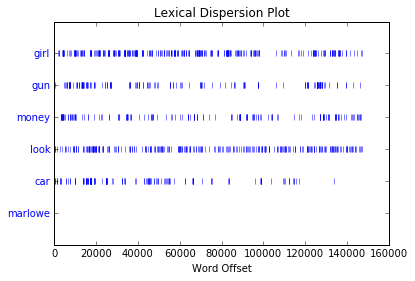

In [14]:
books.dispersion_plot(['girl','gun','money','look','car','marlowe'])

In [15]:
bookwords = [i for i in books]

In [16]:
books.similar('man')

woman elihu dorothy told room women found lawyer mans drank way face
looked visitor yellow rumbling rocked go still partners


In [17]:
books.similar('gun')

right knees one taxi shop show settee money rest thanks go hell chair
children letting taxicab hold police laid fitzstephan


In [18]:
books.similar('girl')

door paper paul police dundy hands day went dorothy see anything son
sat knew anybody agreed rest four ghastly slanting


In [19]:
books.common_contexts(['man','gun'])

No common contexts were found


In [20]:
books.concordance('man')

Displaying 25 of 821 matches:
                                      man gray first heard personville called p
ongregation stopped beside square set man rumpled gray clothes face grayish eve
 looking bullet holes shot asked gray man scratched neck somebody gun wanted in
o hours drinking whiskey talking gray man think right card showed one mentioned
forty years old elihu willsson father man killed night owned personville heart 
tand asked papa put papa put mean old man maybe guess came home began running p
ss came home began running papers old man old devil even getting close grave le
e lew whisper goes far enough get old man using boy shake em loose guess got ti
hotel beefy fellow look plain clothes man stood curb talked occupant stutz tour
car bill quint told looked past beefy man saw thaler profile young dark small p
ures regular cut die cute uh huh gray man agreed dynamite ii czar poisonville m
s block looked hearing shots saw dead man lying sidewalk man woman bending stre
ing shots 

In [21]:
books.collocations()

ned beaumont; shook head; san francisco; district attorney; last
night; brigid oshaughnessy; new york; dinah brand; fat man; living
room; effie perine; thousand dollars; janet henry; old man; say
anything; lower lip; taylor henry; opened door; julia wolf; cleared
throat


In [22]:
books.count('gun')+books.count('guns')

197

In [23]:
fd = nltk.FreqDist(books)

In [24]:
fd

FreqDist({u'fawn': 2,
          u'yellow': 60,
          u'factory': 3,
          u'four': 136,
          u'askew': 1,
          u'woods': 2,
          u'paolis': 1,
          u'hanging': 31,
          u'ringlets': 1,
          u'gabrielle': 184,
          u'increase': 4,
          u'fiddling': 1,
          u'scold': 2,
          u'consulate': 1,
          u'fingernails': 5,
          u'hermann': 9,
          u'lord': 10,
          u'shaving': 3,
          u'swivel': 2,
          u'bellyache': 2,
          u'trojan': 1,
          u'pigment': 1,
          u'forties': 4,
          u'foul': 2,
          u'experimentally': 2,
          u'stabbed': 6,
          u'bringing': 19,
          u'markers': 4,
          u'disturb': 3,
          u'prize': 2,
          u'elihu': 59,
          u'wednesday': 2,
          u'wavered': 1,
          u'shows': 6,
          u'commented': 1,
          u'guardsmen': 1,
          u'charter': 2,
          u'glassy': 5,
          u'tired': 46,
          u'glasss'

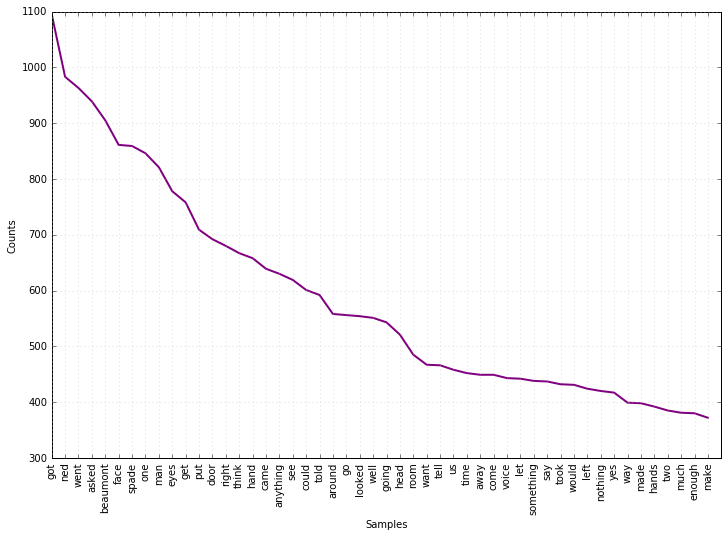

In [25]:
plt.figure(figsize = (12,8))
fd.plot(50,cumulative=False,color='purple')

In [26]:
fd.hapaxes()

[u'keno',
 u'paolis',
 u'ringlets',
 u'pierce',
 u'pigment',
 u'wavered',
 u'busybody',
 u'commented',
 u'guardsmen',
 u'glasss',
 u'elegant',
 u'crisply',
 u'sailed',
 u'edmondson',
 u'relieving',
 u'semicircular',
 u'thunder',
 u'cooking',
 u'bonuses',
 u'specialist',
 u'reporter',
 u'interrupting',
 u'military',
 u'spotty',
 u'topography',
 u'garageman',
 u'shabbily',
 u'replace',
 u'cocaine',
 u'cloven',
 u'moth',
 u'passport',
 u'plodded',
 u'carlists',
 u'anywheres',
 u'pointedly',
 u'hurl',
 u'unti1',
 u'leaped',
 u'example',
 u'pooped',
 u'glued',
 u'arresting',
 u'somebodys',
 u'livened',
 u'hoe',
 u'stickum',
 u'dimple',
 u'travel',
 u'drying',
 u'gouge',
 u'preferable',
 u'typed',
 u'despondent',
 u'forefingers',
 u'pimps',
 u'duveen',
 u'italy',
 u'extortion',
 u'types',
 u'calves',
 u'welts',
 u'effective',
 u'attracts',
 u'childhood',
 u'18th',
 u'lindbergh',
 u'hellbent',
 u'sarcastically',
 u'pocketknife',
 u'welcomed',
 u'roquefort',
 u'soothingly',
 u'sentry',
 u'wrou

In [27]:
books.count('dame')

13

In [28]:
books.count('girl')

361

#### per book

In [29]:
sent = pd.read_pickle('sentiment.pkl')

In [30]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

In [31]:
from collections import Counter

In [32]:
woman = [u'she',u'her',u'girl',u'woman',u'blonde']
uniwoman = [unicode(i) for i in woman]

In [33]:
wordcounts=[]
wordprop = []
lengths = []
fds = []
sentscore = []
sentpages = []
womanpages = []
poscount = []
negcount = []

for i in texts:
    lengths.append(len(i))
    book = nltk.Text(i)
    wordcounts.append([book.count('gun'), book.count('girl'), book.count('cigarette')])
    wordprop.append([(book.count('gun')/float(len(i))), (book.count('girl')/float(len(i))),(book.count('cigarette')/float(len(i)))])
    fd = nltk.FreqDist(book)
    fds.append(fd)
    
    #bookwords = [i.encode('utf-8') for i in book]
    bookwords = [i for i in book]
    words = pd.DataFrame(columns=['word'])
    words.word = bookwords
    booksentiment = pd.merge(words, sent, how='left', on='word')
    booksentiment.fillna(0, inplace=True)
    sentscore.append(sum(booksentiment.sentiment))
    
    pagesent = []
    for chunk in chunker(booksentiment,150):
        pagesent.append(sum(chunk.sentiment))
    sentpages.append(pagesent)
    
    pagewoman = []
    for chunk in chunker(bookwords,150):
        womantmp = 0
        for word in chunk:
            if word in uniwoman:
                womantmp+=1
        pagewoman.append(womantmp)
    womanpages.append(pagewoman)
    
    poscount.append(Counter(booksentiment.sentiment.values)[1])
    negcount.append(Counter(booksentiment.sentiment.values)[-1])

In [34]:
lengths

[27586, 30856, 33467, 30718, 24753]

In [35]:
#pre stop word lengths: [31642, 37630, 32703, 33922, 36076, 55034, 22985]

In [36]:
poscount

[3546, 4300, 4426, 3927, 3536]

In [37]:
posprop = [i/float(j) for i,j in zip(poscount,lengths)]

In [38]:
#pre stop pos: [4766, 5763, 5463, 5239, 5745, 9284, 3897]
#pre stop neg: [3828, 4418, 3777, 3992, 4362, 6848, 2526]

In [39]:
negcount

[3127, 3669, 4412, 3164, 2703]

In [40]:
negprop = [i/float(j) for i,j in zip(negcount,lengths)]

In [41]:
negprop

[0.11335460015950119,
 0.11890718174747213,
 0.1318313562613918,
 0.10300149749332639,
 0.10919888498363835]

In [42]:
posprop

[0.12854346407598058,
 0.13935701322271196,
 0.13224967878805988,
 0.1278403541897259,
 0.14285137155092312]

In [43]:
gun = [i[0] for i in wordprop]
girl = [i[1] for i in wordprop]
cig = [i[2] for i in wordprop]

In [44]:
gun

[0.002428768215761618,
 0.0010046668395125745,
 0.0007171243314309619,
 0.0005208672439611954,
 0.0015351674544499658]

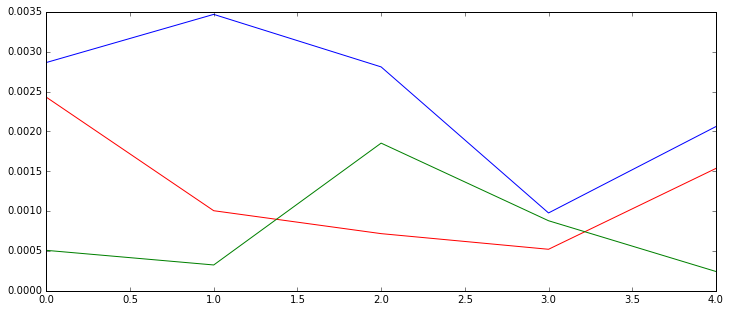

In [45]:
plt.figure(figsize=(12,5))
plt.plot(range(len(gun)),gun,color='r')
plt.plot(range(len(girl)),girl,color='b')
plt.plot(range(len(cig)),cig,color='g')

In [46]:
normlengths = [(i-np.mean(lengths))/(max(lengths)-min(lengths)) for i in lengths]
normsent = [(i-np.mean(sentscore))/(max(sentscore)-min(sentscore)) for i in sentscore]

In [47]:
normlengths

[-0.21689235712646315,
 0.15836584806059215,
 0.45799862290566906,
 0.14252926325453294,
 -0.54200137709433094]

In [48]:
normsent

[-0.13797313797313798,
 0.12087912087912088,
 -0.63247863247863245,
 0.28205128205128205,
 0.36752136752136755]

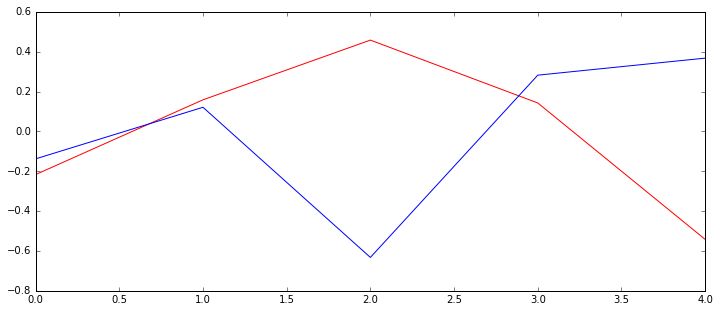

In [49]:
plt.figure(figsize=(12,5))
plt.plot(range(len(normlengths)),normlengths,color='r')
plt.plot(range(len(normsent)),normsent,color='b')

In [50]:
gunabs = [i[0] for i in wordcounts]
girlabs = [i[1] for i in wordcounts]
cigabs = [i[2] for i in wordcounts]

In [51]:
wordcounts

[[67, 79, 14], [31, 107, 10], [24, 94, 62], [16, 30, 27], [38, 51, 6]]

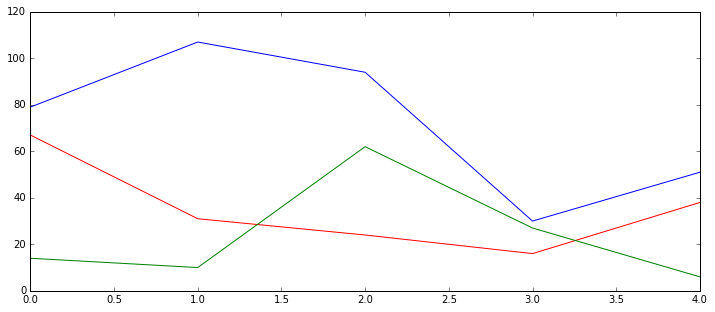

In [52]:
plt.figure(figsize=(12,5))
plt.plot(range(len(gunabs)),gunabs,color='r')
plt.plot(range(len(girlabs)),girlabs,color='b')
plt.plot(range(len(cigabs)),cigabs,color='g')

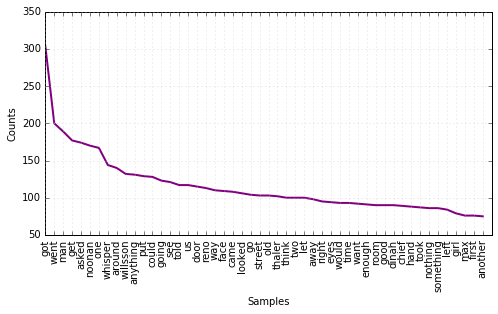

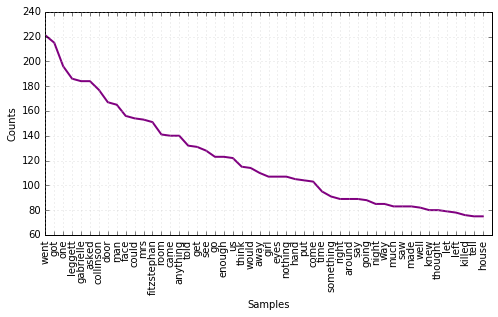

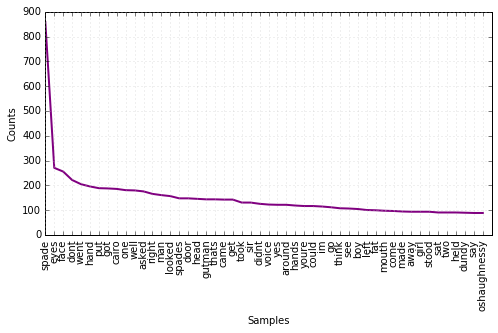

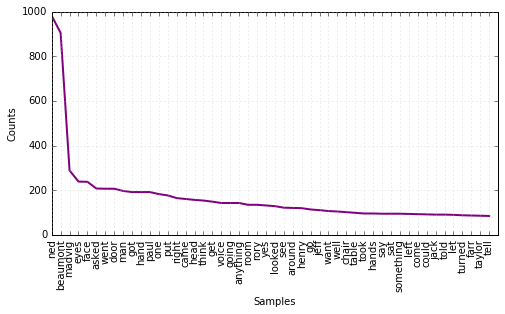

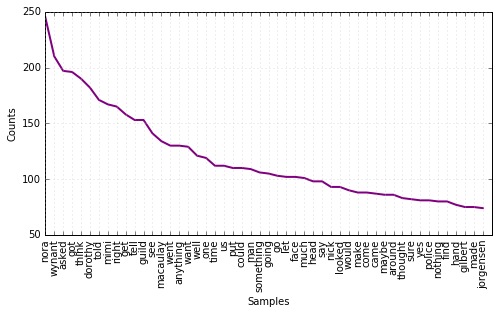

In [53]:
for i in fds:
    plt.figure(figsize=(8,4))
    i.plot(50,cumulative=False,color='purple')

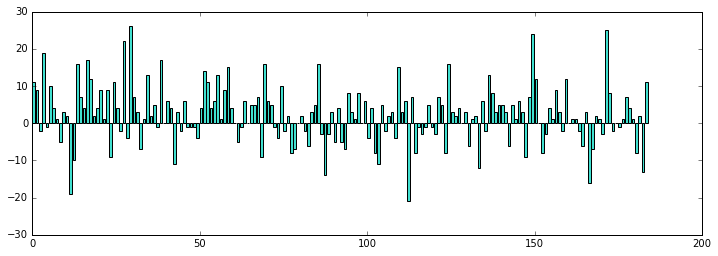

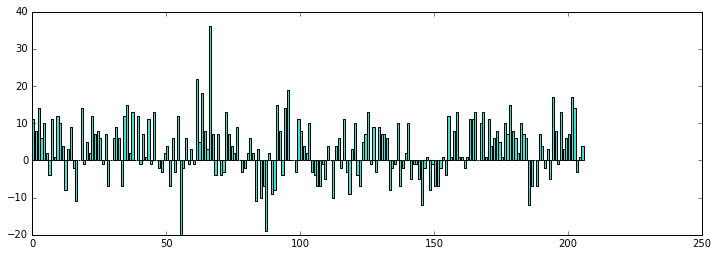

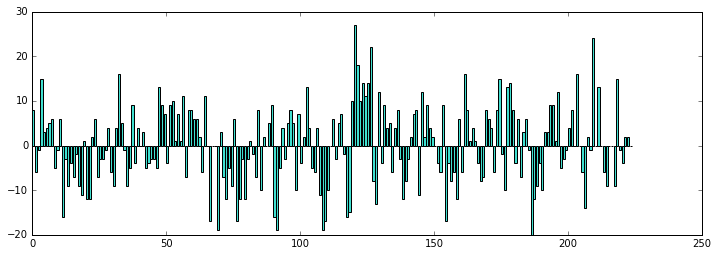

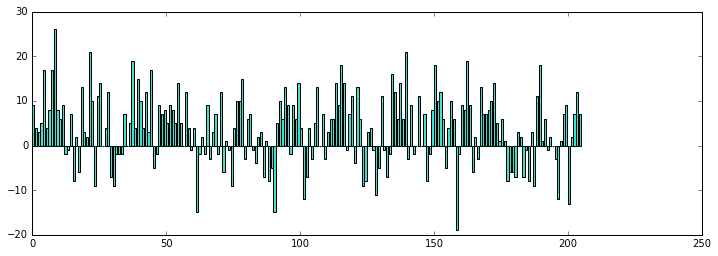

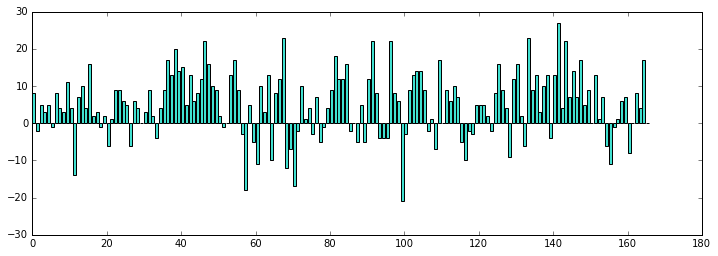

In [54]:
for i in sentpages:
    plt.figure(figsize=(12,4))
    plt.bar(range(len(i)),i,color='turquoise')

#### sentiment transforms

In [55]:
import scipy

In [56]:
from scipy import fftpack

#### sp1

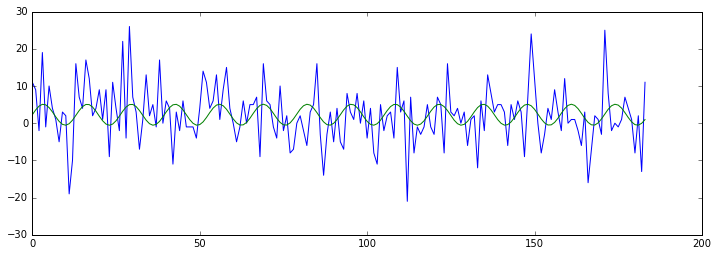

In [57]:
x = range(len(sentpages[0]))
cN = len(sentpages[0])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[0])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/3)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp1

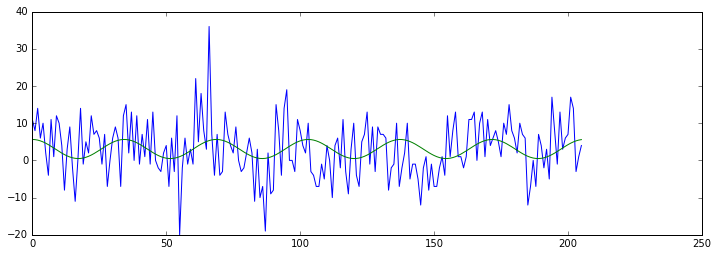

In [58]:
x = range(len(sentpages[1]))
cN = len(sentpages[1])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[1])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/6)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp2

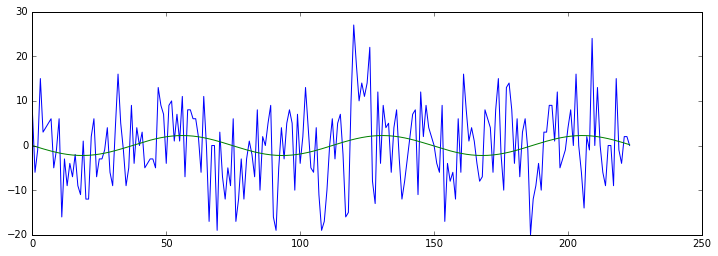

In [59]:
x = range(len(sentpages[2]))
cN = len(sentpages[2])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[2])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/1)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp3

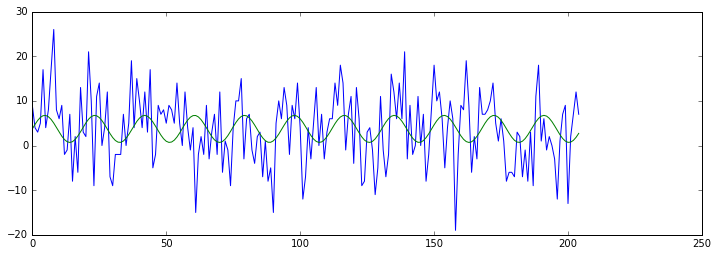

In [60]:
x = range(len(sentpages[3]))
cN = len(sentpages[3])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[3])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/13)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sp4

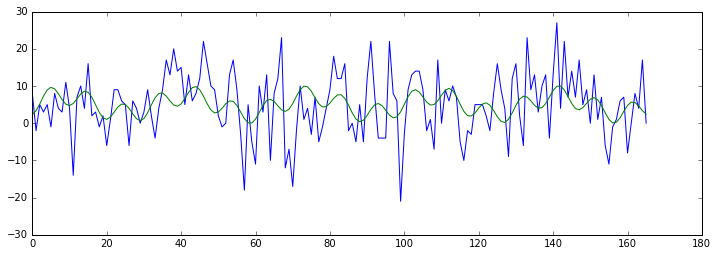

In [61]:
x = range(len(sentpages[4]))
cN = len(sentpages[4])
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(sentpages[4])

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/17)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)

plt.figure(figsize=(12,4))
plt.plot(x, cy)
plt.plot(x, cy2)

#### sentiment dictionary

In [62]:
sentdictwords = sent.word.values

In [63]:
uniques = set(together)

In [64]:
unique = [i for i in uniques]

In [65]:
len(unique), len(together)

(11504, 147380)

In [66]:
rep = []
for word in unique:
    if word in sentdictwords:
        rep.append(word)

In [67]:
len(rep)

4762

In [68]:
rep

[u'fawn',
 u'yellow',
 u'hanging',
 u'looking',
 u'scold',
 u'lord',
 u'shaving',
 u'foul',
 u'disturb',
 u'prize',
 u'busybody',
 u'tired',
 u'elegant',
 u'haughtily',
 u'blouse',
 u'captain',
 u'relieving',
 u'spitefulness',
 u'thunder',
 u'cooking',
 u'bonuses',
 u'increasing',
 u'admiral',
 u'specialist',
 u'hero',
 u'reporter',
 u'reported',
 u'cult',
 u'substance',
 u'military',
 u'spotty',
 u'golden',
 u'divide',
 u'replace',
 u'stern',
 u'cocaine',
 u'cheating',
 u'spoke',
 u'moth',
 u'music',
 u'therefore',
 u'strike',
 u'holy',
 u'relax',
 u'successful',
 u'hurt',
 u'pointedly',
 u'glass',
 u'hole',
 u'hold',
 u'household',
 u'organized',
 u'arresting',
 u'caution',
 u'want',
 u'absolute',
 u'hog',
 u'hoe',
 u'complaining',
 u'travel',
 u'damage',
 u'machine',
 u'hot',
 u'hop',
 u'gouge',
 u'preferable',
 u'dignified',
 u'beauty',
 u'despondent',
 u'wrong',
 u'extortion',
 u'effective',
 u'wins',
 u'headquarters',
 u'childhood',
 u'wind',
 u'wine',
 u'sarcastically',
 u'welco

In [69]:
sentwords = zip(sent.word, sent.sentiment)

In [70]:
poswords = []
negwords = []
for i in sentwords:
    if i[1] == 1:
        poswords.append(i[0])
    elif i[1] == -1:
        negwords.append(i[0])

In [80]:
sentwords

[(u'2-faced', -1),
 (u'2-faces', -1),
 (u'a+', 1),
 (u'aback', 0),
 (u'abacus', 0),
 (u'abandon', -1),
 (u'abandoned', -1),
 (u'abandonment', -1),
 (u'abase', -1),
 (u'abasement', -1),
 (u'abash', -1),
 (u'abate', -1),
 (u'abba', 1),
 (u'abbot', 0),
 (u'abdicate', -1),
 (u'abduction', -1),
 (u'aberrant', -1),
 (u'aberration', -1),
 (u'abeyance', 0),
 (u'abhor', -1),
 (u'abhorred', -1),
 (u'abhorrence', -1),
 (u'abhorrent', -1),
 (u'abhorrently', -1),
 (u'abhors', -1),
 (u'abidance', 1),
 (u'abide', 1),
 (u'abilities', 1),
 (u'ability', 1),
 (u'abject', -1),
 (u'abjectly', -1),
 (u'abjure', -1),
 (u'ablaze', 0),
 (u'able', 1),
 (u'abnormal', -1),
 (u'aboard', 0),
 (u'abode', 0),
 (u'abolish', -1),
 (u'abolition', -1),
 (u'abominable', -1),
 (u'abominably', -1),
 (u'abominate', -1),
 (u'abomination', -1),
 (u'aboriginal', 0),
 (u'abort', -1),
 (u'aborted', -1),
 (u'abortion', -1),
 (u'abortive', -1),
 (u'aborts', -1),
 (u'abound', 1),
 (u'abounds', 1),
 (u'above', 1),
 (u'above-average',

In [81]:
len(poswords), len(negwords)

(4295, 6621)

In [82]:
4295/(4295+6621.0)

0.3934591425430561

In [71]:
chandlerposwords = []
chandlernegwords = []
for i in rep:
    if i in poswords:
        chandlerposwords.append(i)
    elif i in negwords:
        chandlernegwords.append(i)

In [72]:
chandlerposwords

[u'prize',
 u'elegant',
 u'captain',
 u'relieving',
 u'bonuses',
 u'admiral',
 u'hero',
 u'reporter',
 u'substance',
 u'golden',
 u'music',
 u'holy',
 u'relax',
 u'successful',
 u'pointedly',
 u'household',
 u'organized',
 u'arresting',
 u'want',
 u'absolute',
 u'travel',
 u'hot',
 u'preferable',
 u'dignified',
 u'beauty',
 u'effective',
 u'wins',
 u'childhood',
 u'welcomed',
 u'soothingly',
 u'fit',
 u'easier',
 u'scholar',
 u'spotless',
 u'substantially',
 u'encourage',
 u'adapt',
 u'assured',
 u'playfully',
 u'master',
 u'positively',
 u'tree',
 u'wholesome',
 u'concrete',
 u'responsible',
 u'eagerly',
 u'rich',
 u'heartily',
 u'cushion',
 u'nicely',
 u'accordance',
 u'fair',
 u'best',
 u'score',
 u'dexterously',
 u'topmost',
 u'truthful',
 u'conversational',
 u'child',
 u'worked',
 u'elaborate',
 u'trusted',
 u'fairly',
 u'tops',
 u'ownership',
 u'stillness',
 u'succeeding',
 u'ease',
 u'easy',
 u'birth',
 u'unique',
 u'desire',
 u'attorney',
 u'right',
 u'insistence',
 u'consensus

In [73]:
chandlernegwords

[u'fawn',
 u'hanging',
 u'scold',
 u'lord',
 u'foul',
 u'disturb',
 u'busybody',
 u'tired',
 u'haughtily',
 u'spitefulness',
 u'cult',
 u'spotty',
 u'divide',
 u'stern',
 u'cocaine',
 u'cheating',
 u'spoke',
 u'strike',
 u'hurt',
 u'hole',
 u'caution',
 u'hog',
 u'complaining',
 u'damage',
 u'gouge',
 u'despondent',
 u'wrong',
 u'extortion',
 u'sarcastically',
 u'wrought',
 u'wickedly',
 u'screaming',
 u'hidden',
 u'ached',
 u'indecent',
 u'clumsy',
 u'addicted',
 u'whip',
 u'smirk',
 u'disinterested',
 u'fugitive',
 u'enormous',
 u'disturbed',
 u'loudness',
 u'bitter',
 u'collapse',
 u'motionless',
 u'crawl',
 u'peril',
 u'coward',
 u'rusty',
 u'pneumonia',
 u'idle',
 u'feeling',
 u'shyly',
 u'pigs',
 u'defiantly',
 u'hum',
 u'object',
 u'addict',
 u'conceded',
 u'scream',
 u'bomb',
 u'busy',
 u'bust',
 u'touched',
 u'emphatically',
 u'spilling',
 u'patch',
 u'unexpectedly',
 u'resigned',
 u'stealthy',
 u'scorn',
 u'pirate',
 u'smelled',
 u'debt',
 u'pity',
 u'accident',
 u'dents',
 u

In [74]:
len(chandlerposwords)/float(len(chandlerposwords)+ len(chandlernegwords))

0.44115853658536586

In [75]:
Counter(together).most_common()

[(u'got', 1095),
 (u'ned', 983),
 (u'went', 963),
 (u'asked', 939),
 (u'beaumont', 905),
 (u'face', 861),
 (u'spade', 859),
 (u'one', 846),
 (u'man', 821),
 (u'eyes', 778),
 (u'get', 758),
 (u'put', 709),
 (u'door', 692),
 (u'right', 680),
 (u'think', 667),
 (u'hand', 658),
 (u'came', 639),
 (u'anything', 630),
 (u'see', 619),
 (u'could', 601),
 (u'told', 592),
 (u'around', 558),
 (u'go', 556),
 (u'looked', 554),
 (u'well', 551),
 (u'going', 543),
 (u'head', 521),
 (u'room', 485),
 (u'want', 467),
 (u'tell', 466),
 (u'us', 458),
 (u'time', 452),
 (u'away', 449),
 (u'come', 449),
 (u'voice', 443),
 (u'let', 442),
 (u'something', 438),
 (u'say', 437),
 (u'took', 432),
 (u'would', 431),
 (u'left', 424),
 (u'nothing', 420),
 (u'yes', 417),
 (u'way', 399),
 (u'made', 398),
 (u'hands', 392),
 (u'two', 385),
 (u'much', 381),
 (u'enough', 380),
 (u'make', 372),
 (u'girl', 361),
 (u'good', 358),
 (u'turned', 329),
 (u'sat', 321),
 (u'take', 310),
 (u'night', 310),
 (u'thought', 309),
 (u'maybe'

In [76]:
completeposwords = []
completenegwords = []
for i in together:
    if i in poswords:
        completeposwords.append(i)
    elif i in negwords:
        completenegwords.append(i)

In [77]:
len(completeposwords), len(completenegwords)

(19735, 17075)

In [78]:
Counter(completeposwords).most_common()

[(u'right', 680),
 (u'hand', 658),
 (u'well', 551),
 (u'want', 467),
 (u'yes', 417),
 (u'enough', 380),
 (u'make', 372),
 (u'good', 358),
 (u'sure', 282),
 (u'stood', 278),
 (u'give', 270),
 (u'found', 270),
 (u'police', 238),
 (u'talk', 205),
 (u'might', 196),
 (u'even', 193),
 (u'help', 189),
 (u'white', 185),
 (u'sir', 176),
 (u'home', 175),
 (u'money', 168),
 (u'open', 165),
 (u'better', 144),
 (u'god', 139),
 (u'kind', 134),
 (u'smile', 132),
 (u'matter', 118),
 (u'rest', 118),
 (u'light', 111),
 (u'pretty', 110),
 (u'straight', 109),
 (u'kid', 105),
 (u'call', 103),
 (u'work', 99),
 (u'shoulder', 99),
 (u'young', 96),
 (u'standing', 95),
 (u'word', 94),
 (u'attorney', 88),
 (u'care', 88),
 (u'stand', 88),
 (u'building', 88),
 (u'forward', 84),
 (u'job', 83),
 (u'truth', 82),
 (u'best', 77),
 (u'wide', 76),
 (u'please', 75),
 (u'understand', 73),
 (u'green', 72),
 (u'working', 71),
 (u'ahead', 71),
 (u'eye', 71),
 (u'round', 70),
 (u'reason', 70),
 (u'question', 70),
 (u'daughter'

In [79]:
Counter(completenegwords).most_common()

[(u'spade', 859),
 (u'killed', 292),
 (u'long', 245),
 (u'mean', 233),
 (u'boy', 219),
 (u'dark', 217),
 (u'hell', 197),
 (u'trying', 188),
 (u'gun', 176),
 (u'small', 162),
 (u'fat', 161),
 (u'dead', 152),
 (u'black', 149),
 (u'damned', 143),
 (u'mind', 142),
 (u'try', 131),
 (u'hard', 126),
 (u'close', 126),
 (u'miss', 124),
 (u'cigarette', 119),
 (u'murder', 117),
 (u'shot', 116),
 (u'kill', 116),
 (u'spoke', 113),
 (u'words', 111),
 (u'afraid', 109),
 (u'bad', 102),
 (u'trouble', 96),
 (u'wait', 94),
 (u'slowly', 93),
 (u'pistol', 86),
 (u'leave', 82),
 (u'ill', 78),
 (u'blood', 78),
 (u'hurt', 76),
 (u'wrong', 76),
 (u'pale', 76),
 (u'least', 72),
 (u'supposed', 72),
 (u'killing', 71),
 (u'cut', 68),
 (u'mother', 67),
 (u'lying', 67),
 (u'empty', 67),
 (u'sorry', 66),
 (u'cold', 64),
 (u'low', 64),
 (u'death', 62),
 (u'dick', 60),
 (u'lower', 60),
 (u'loose', 58),
 (u'broke', 58),
 (u'noise', 58),
 (u'knife', 56),
 (u'whatever', 56),
 (u'late', 55),
 (u'hit', 55),
 (u'lie', 54),
 